# Úkoly

1. Vytvořte pole 3x4 typu `bool` se všemi prvky `True`.
2. Vytvořte matici 5x5 kde jediné nenulová prvky jsou [1, 2, 3, 4] pod hlavní diagonálou (nápověda - podívejte se na nápovědu funkce `diagflat`).
```
0 0 0 0 0
1 0 0 0 0
0 2 0 0 0
0 0 3 0 0 
0 0 0 4 0
```

In [2]:
import numpy as np
A = np.ndarray(shape=[3,4], dtype=bool)
A.fill(True)
A

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [3]:
import numpy as np
B = np.diagflat([1,2,3,4], -1)
B

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

3. Z pole 8x8 samých nul vyvořte pomocí řezů co nejelegantnějším způsobem 8x8 matici, která vypadá jako šachovnice.
```
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
```
4. Pomocí `np.random.randint` vytvořte vektor dvouciferných kladných celých čísel. Poté pomocí indexu typu masky nahraďte liché hodnoty jejich opačnou hodnotou. Např. [11, 20, 42, 33] -> [-11, 20, 42, -33].

In [4]:
C = np.zeros((8,8))
C[1::2, 1::2]=1
C[::2,::2] = 1
C

array([[1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.]])

In [5]:
my_vec_1 = np.random.randint(size = 3, low = -50, high = 50)
my_vec_2 = np.random.randint(size = 3, low = -50, high = 50)
print(my_vec_1)
my_vec_1[my_vec_1%2 != 0] *= -1 
print(my_vec_1)

[  9 -32  39]
[ -9 -32 -39]


5. Ověřte empiricky na náhodné matici, že platí $(AB)^T = B^T A^T$


In [6]:
import numpy as np
A =np.random.randint(size=[2,2],low = -50, high = 50)
B =np.random.randint(size=[2,2],low = -50, high = 50)
print((A*B).transpose())
print(B.transpose()*A.transpose())

[[  66  -34]
 [1196 -525]]
[[  66  -34]
 [1196 -525]]


6. Pro náhodné 1D vektory $u, v$ vypočítejte dyadický součin $uv$ $$(uv)_{ij} = u_iv_j$$ pomocí `newaxis`. Zkontrolujte s `np.outer(u, v)`

In [7]:
my_vec_1 = np.random.randint(size = 3, low = -50, high = 50)
my_vec_2 = np.random.randint(size = 3, low = -50, high = 50)
my_vec_1 = my_vec_1[: , np.newaxis]
A = my_vec_1 * my_vec_2

print(A)
print(np.outer(my_vec_1,my_vec_2))

[[ -704   736 -1056]
 [ -330   345  -495]
 [  110  -115   165]]
[[ -704   736 -1056]
 [ -330   345  -495]
 [  110  -115   165]]


In [8]:
to_plot = np.tile(np.concatenate((np.tile([1,0],4),np.tile([0,1],4))),4).reshape(8,8)
print(to_plot)

[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


7. Vytvořte šachovnicovou matici pomocí `tile`.

# Domácí úkoly
## 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [11]:
A = integer_spiral(7)
print(A)

[[31. 30. 29. 28. 27. 26. 49.]
 [32. 13. 12. 11. 10. 25. 48.]
 [33. 14.  3.  2.  9. 24. 47.]
 [34. 15.  4.  1.  8. 23. 46.]
 [35. 16.  5.  6.  7. 22. 45.]
 [36. 17. 18. 19. 20. 21. 44.]
 [37. 38. 39. 40. 41. 42. 43.]]


In [12]:
def integer_spiral_numpy(n):
    #TODO naimplementujte viz zadání
    if n % 2 == 0 and n > 1:
        raise Exception("n should be divisible by 2")
    A= np.zeros((n+2,n+2))
    middle = int(n/2) + 1
    A[middle,middle] = 1
    for i in range(middle+1):
        a = np.arange((i)*2)+((i)**2-(i-1)**2)**2+1
        if i>0:
            A[middle-i,middle-i:middle+i]= a[::-1]
            a += i*2
            A[middle-i+1:middle+i+1,middle-i]= a
            a += i*2
            A[middle+i,middle-i+1:middle+i+1]= a
            a += i*2
            A[middle-i:middle+i,middle+i]= a[::-1]
        
    return(A[1:-1, 1:-1])
    pass 

In [13]:
A = integer_spiral_numpy(7)
print(A)

[[31. 30. 29. 28. 27. 26. 49.]
 [32. 13. 12. 11. 10. 25. 48.]
 [33. 14.  3.  2.  9. 24. 47.]
 [34. 15.  4.  5.  8. 23. 46.]
 [35. 16.  5.  6.  7. 22. 45.]
 [36. 17. 18. 19. 20. 21. 44.]
 [37. 38. 39. 40. 41. 42. 43.]]


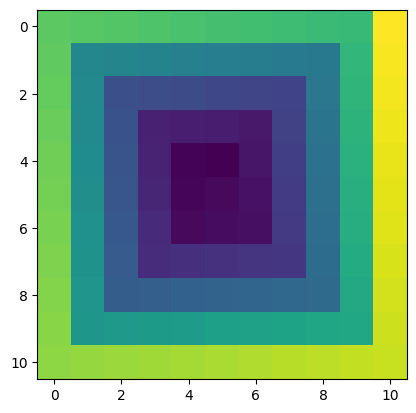

In [14]:
plt.imshow(integer_spiral_numpy(11),interpolation_stage="rgba")

In [15]:
%%timeit
integer_spiral(1701)

2.41 s ± 33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
integer_spiral_numpy(1701)

22.9 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
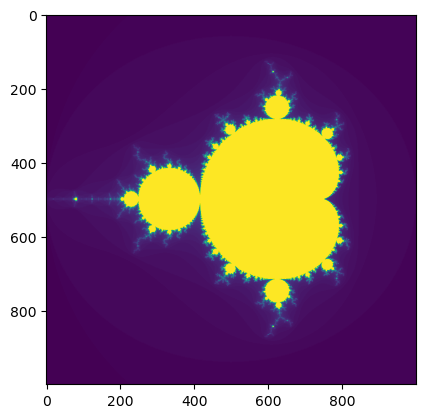

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [17]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    re = np.linspace(start=x_min, stop=x_max, num = n)
    im = np.linspace(start=y_min, stop=y_max, num = n)
    re_num,im_num =np.meshgrid(re,im)
    mtx_c = re_num + 1j *im_num
    div_mtx = np.zeros((n,n))
    mtx_c.shape
    z = np.zeros((n,n),dtype=complex)

    for i in range(k):
        z = z**2 + mtx_c
        div_mtx[np.abs(z) > 2] = i
        z[np.abs(z) > 2] = 0
        mtx_c[np.abs(z) > 2] =0
    
    return div_mtx


    pass

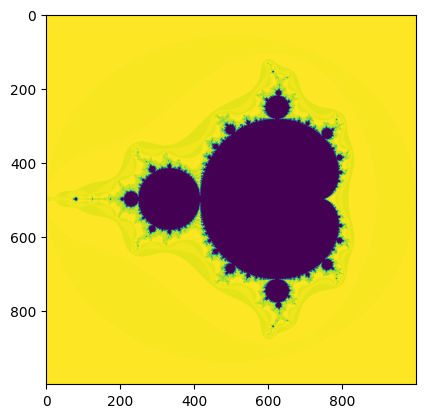

In [18]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
- Zkuste si číselnou spirálu vykreslit, a vykreslit různé funkce, můžete dostat zajímavé obrázky.
- Zkuste místo posloupnosti 1,2,... udělat spirálu pouze z prvočísel.
- Zkuste vykresilt další typy fraktálů, např. Julia set viz [Wikipedia](https://en.wikipedia.org/wiki/Julia_set).

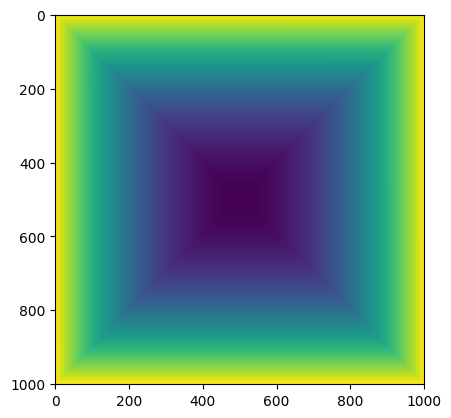

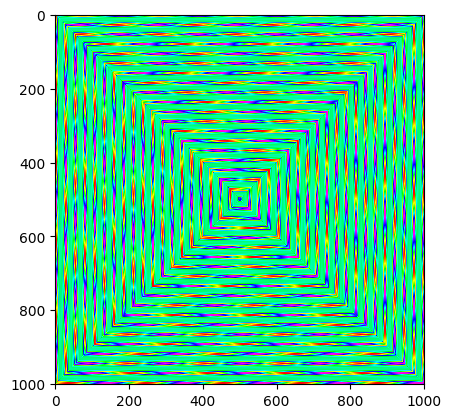

In [19]:
A = integer_spiral(1001)
plt.imshow(A)
# new figure
plt.figure()
plt.imshow(np.sin(A*0.03),cmap="gist_rainbow")

In [20]:
np.zeros(shape=[5,5])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

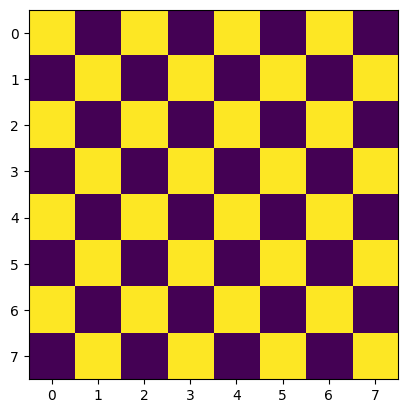

In [21]:
plt.imshow(to_plot)

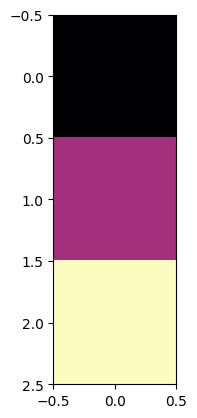

In [22]:
plt.imshow(my_vec_1,cmap='magma')

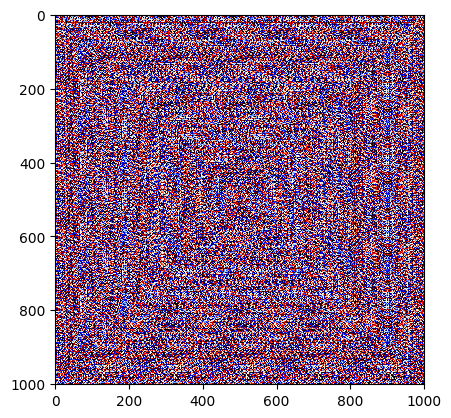

In [23]:
plt.imshow(np.sin(A),cmap="flag")

/tmp/ipykernel_28330/483488668.py:1: RuntimeWarning: divide by zero encountered in power
  plt.imshow(divergence_matrix**-2000)*np.exp(divergence_matrix)


TypeError: unsupported operand type(s) for *: 'AxesImage' and 'float'

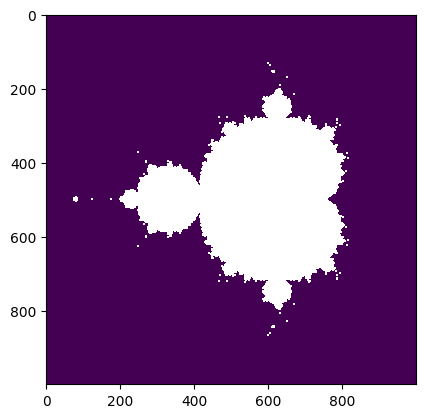

In [24]:
plt.imshow(divergence_matrix**-2000)*np.exp(divergence_matrix)

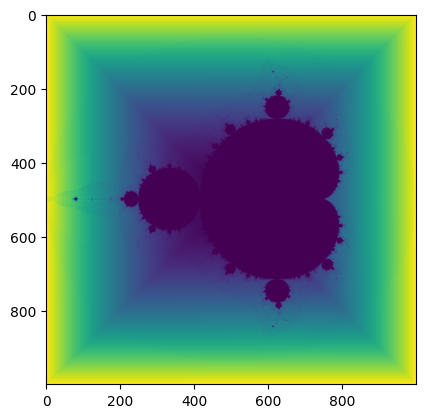

In [ ]:
plt.imshow(A[:-1,:-1]*divergence_matrix)

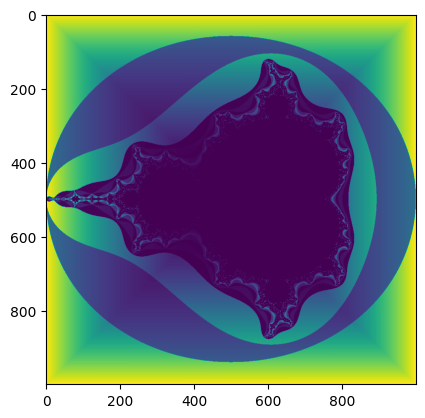

In [ ]:
plt.imshow(A[:-1,:-1]*np.exp(divergence_matrix))

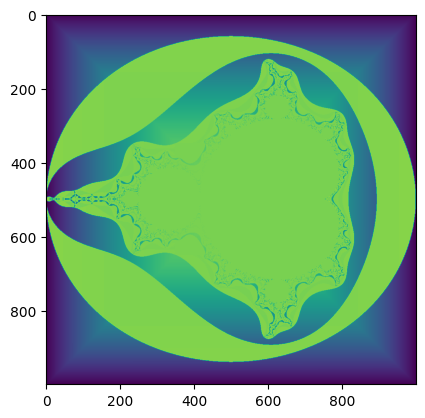

In [ ]:
plt.imshow(A[:-1,:-1]*np.tan(divergence_matrix))

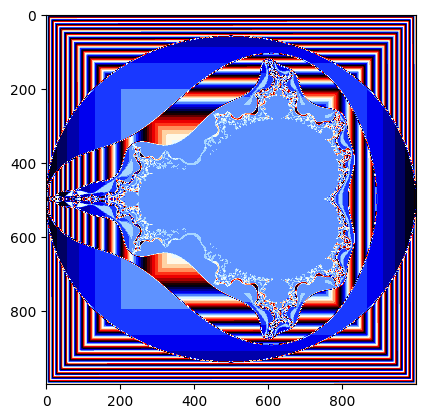

In [ ]:
plt.imshow(A[:-1,:-1] *np.tan(divergence_matrix)*A[:-1,:-1],cmap="flag")

/tmp/ipykernel_24271/1906853659.py:1: RuntimeWarning: divide by zero encountered in log2
  plt.imshow(np.abs(np.log2(divergence_matrix)//A[:-1,:-1]),cmap="flag")
/tmp/ipykernel_24271/1906853659.py:1: RuntimeWarning: invalid value encountered in floor_divide
  plt.imshow(np.abs(np.log2(divergence_matrix)//A[:-1,:-1]),cmap="flag")


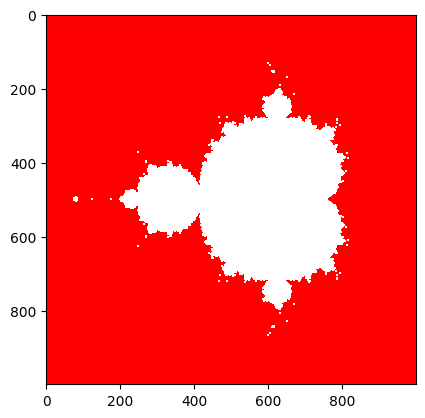

In [ ]:
plt.imshow(np.abs(np.log2(divergence_matrix)//A[:-1,:-1]),cmap="flag")

/tmp/ipykernel_24271/3124407731.py:1: RuntimeWarning: overflow encountered in power
  plt.imshow(np.sin(A[:-1,:-1])**12 *np.sqrt(divergence_matrix)**1203123123,cmap="magma")


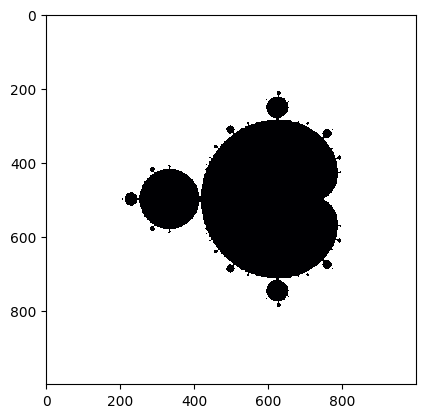

In [ ]:
plt.imshow(np.sin(A[:-1,:-1])**12 *np.sqrt(divergence_matrix)**1203123123,cmap="magma")